Read data from csv and create a basic Time serie object

In [102]:
library(forecast)
library(car)
library(ggplot2)
#library(zoo)
library(scales)
library(repr)

options(scipen=999)

# Change plot size to 10 x 6
options(repr.plot.width=8, repr.plot.height=5)

jp_data <- read.csv2("japan_employment.csv")
#Remove last row, 2015-01
jp_data <- jp_data[1:nrow(jp_data) - 1,]
jp_data$Date <- as.Date(jp_data$Date, format = "%Y-%m-%d")
#Create column with month value
jp_data$Month <- sapply(jp_data$Date, function(x) {format(as.Date(x), "%m")})
#jp_observed_ts <- zoo(jp_data)

Display the unmodified time serie

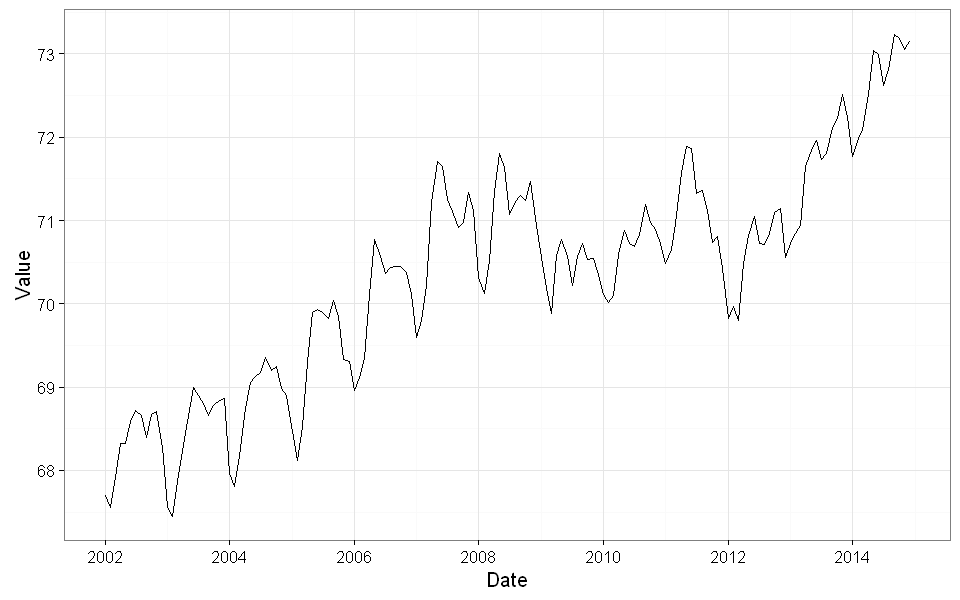

In [103]:
ggplot(jp_data, aes(group = 1)) +
    geom_line(aes(x = Date, y = Value)) +
    theme_bw()

Analyse trend, Linear model


Call:
lm(formula = jp_data$Value ~ index(jp_data))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67539 -0.44073 -0.04604  0.46465  1.72812 

Coefficients:
                Estimate Std. Error t value            Pr(>|t|)    
(Intercept)    68.301040   0.107830  633.42 <0.0000000000000002 ***
index(jp_data)  0.025812   0.001191   21.66 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6702 on 154 degrees of freedom
Multiple R-squared:  0.7529,	Adjusted R-squared:  0.7513 
F-statistic: 469.3 on 1 and 154 DF,  p-value: < 0.00000000000000022


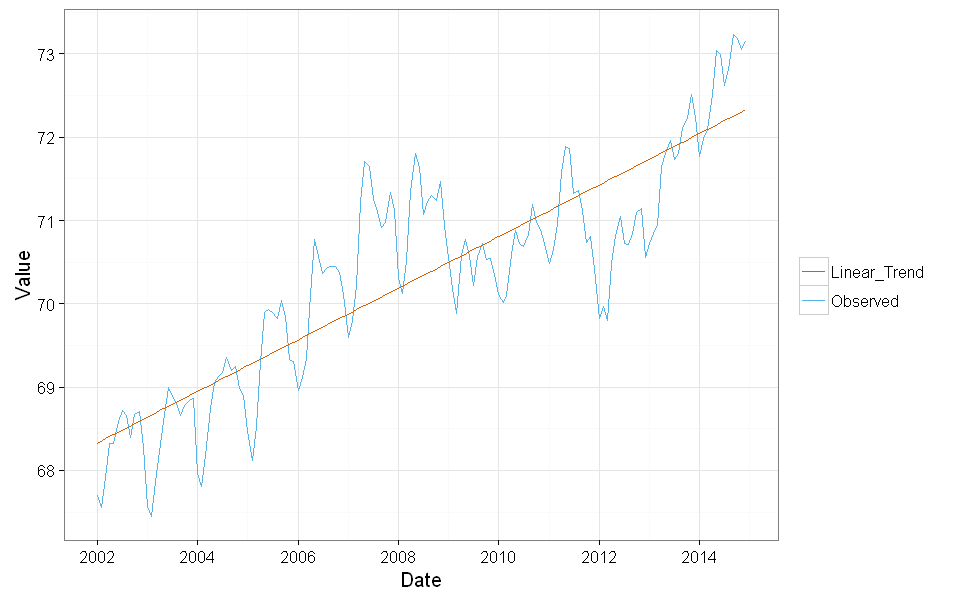

In [104]:
jp_linear_model <- lm(jp_data$Value ~ index(jp_data))
summary(jp_linear_model)
jp_data$Linear_Fit <- jp_linear_model$fitted


ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Linear_Fit, color="Linear_Trend")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Linear_Trend="#D55E00")) +
    theme_bw()



Analyse trend, Polynomial model


Call:
lm(formula = jp_data$Value ~ poly(index(jp_data), 3, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51398 -0.36442  0.00189  0.36611  1.41887 

Coefficients:
                                          Estimate    Std. Error t value
(Intercept)                          67.2432882767  0.1961097800 342.886
poly(index(jp_data), 3, raw = TRUE)1  0.0950256223  0.0107830707   8.812
poly(index(jp_data), 3, raw = TRUE)2 -0.0009982104  0.0001593216  -6.265
poly(index(jp_data), 3, raw = TRUE)3  0.0000039530  0.0000006672   5.925
                                                 Pr(>|t|)    
(Intercept)                          < 0.0000000000000002 ***
poly(index(jp_data), 3, raw = TRUE)1  0.00000000000000262 ***
poly(index(jp_data), 3, raw = TRUE)2  0.00000000364246074 ***
poly(index(jp_data), 3, raw = TRUE)3  0.00000002014017809 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5977 on 152 degrees of freedom
Multipl

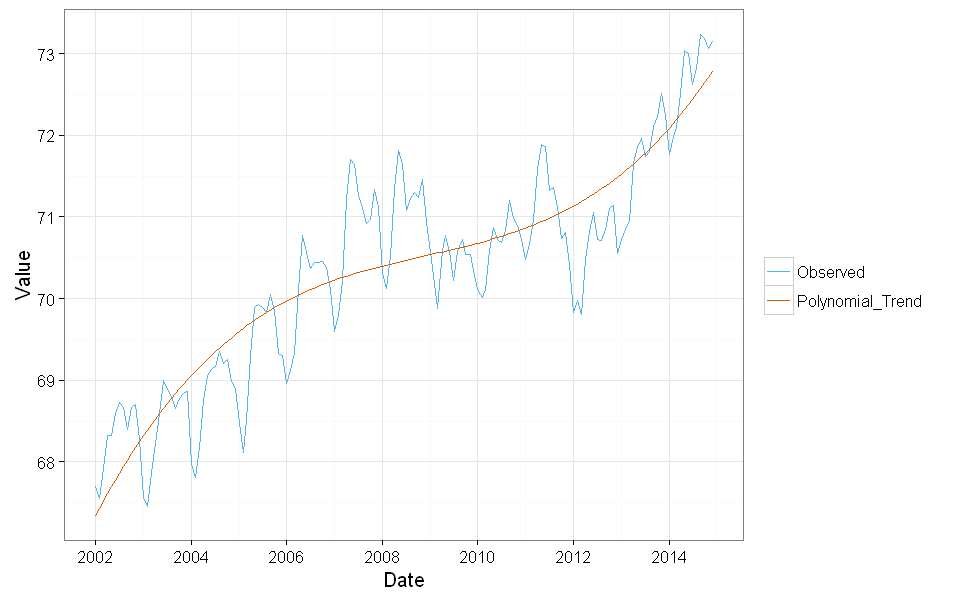

In [105]:
jp_pol_model <- lm(jp_data$Value ~ poly(index(jp_data), 3, raw = TRUE))
summary(jp_pol_model)
jp_data$Pol_Fit <- jp_pol_model$fitted

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Pol_Fit, color="Polynomial_Trend")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Polynomial_Trend="#D55E00")) +
    theme_bw()


Analyse trend, exponetial smoothing model


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = jp_data$Value, h = 24) 

  Smoothing parameters:
    alpha = 0.9906 
    beta  = 0.0001 

  Initial states:
    l = 67.6734 
    b = 0.0355 

  sigma:  0.3397

     AIC     AICc      BIC 
458.9153 459.1802 471.1147 

Error measures:
                      ME      RMSE       MAE          MPE     MAPE      MASE
Training set -0.00035008 0.3397019 0.2679864 -0.001746405 0.381398 0.9902808
                  ACF1
Training set 0.3415088

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
157       73.18678 72.75144 73.62213 72.52098 73.85259
158       73.22225 72.60941 73.83510 72.28498 74.15952
159       73.25772 72.50827 74.00717 72.11154 74.40391
160       73.29319 72.42843 74.15795 71.97066 74.61573
161       73.32866 72.36224 74.29509 71.85064 74.80668
162       73.36413 72.30575 74.42252 71.74547 74.98279
163       73.39960 72.25661 74.54259 71.65155 75.14765
164       73.43507 72.21331 74.

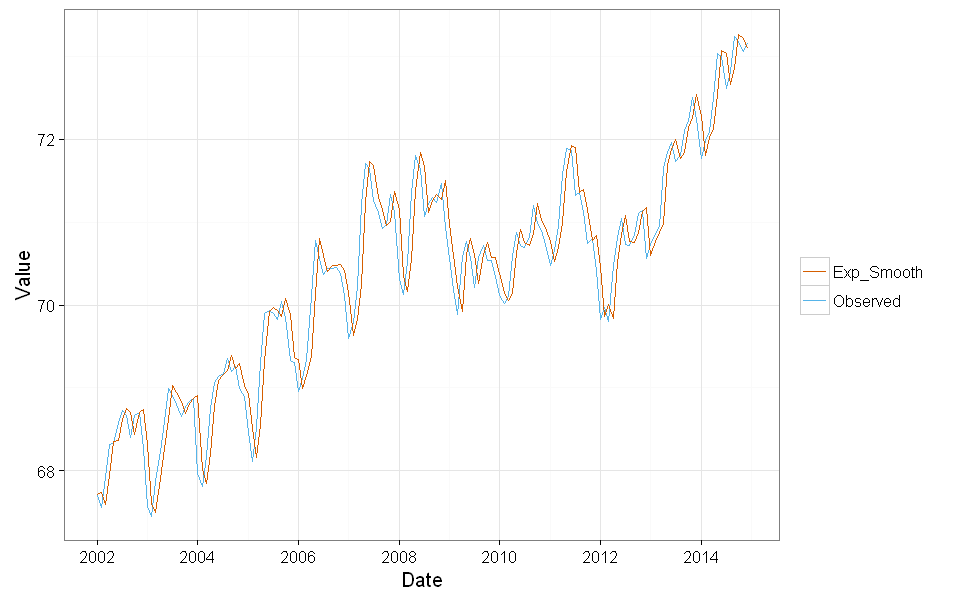

In [106]:
jp_holt_model <- holt(jp_data$Value, h=24)
summary(jp_holt_model)
jp_data$Holt_Fit <- jp_holt_model$fit

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Holt_Fit, color="Exp_Smooth")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Exp_Smooth="#D55E00")) +
    theme_bw()

Decompose time serie

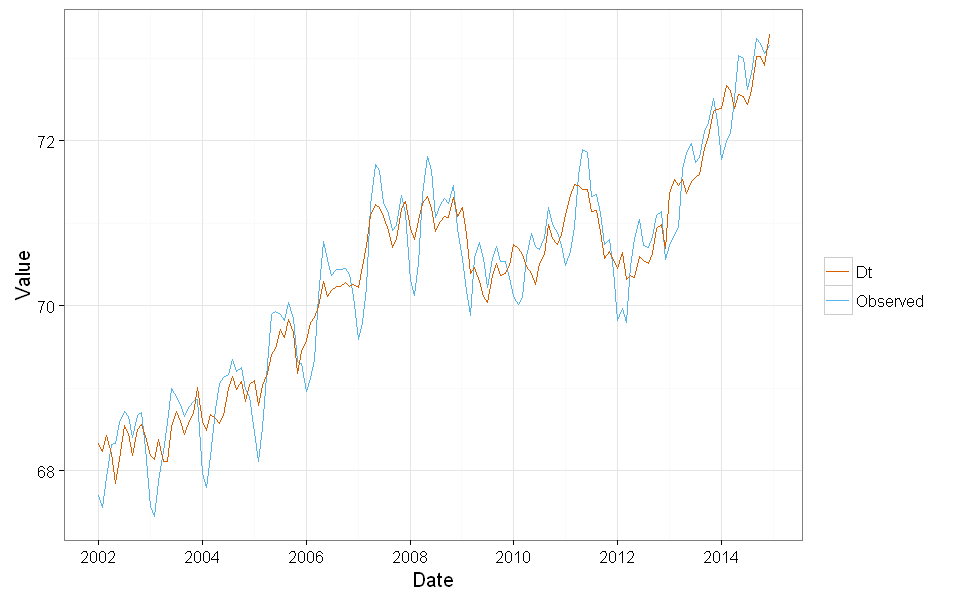

In [107]:
#Calculate moving average
jp_data$Seasonal_Comp <- ma(jp_data$Value, 12)
jp_data$Seasonal_Comp <- ma(jp_data$Seasonal, 4, centre = TRUE)

#Calculate rough seasonal component
jp_data$Seasonal_Comp <- jp_data$Value - jp_data$Seasonal_Comp

temp_monthly_comp <- aggregate(jp_data$Seasonal_Comp ~ jp_data$Month, FUN = mean)
colnames(temp_monthly_comp) <- c("Month", "Seasonal_Comp")

#Calculate how much bigger or smaller the rough component is
fix_ratio <- sum(temp_monthly_comp$Seasonal_Comp) / 12

#Fix the rough seasonal component
temp_monthly_comp$Seasonal_Comp <- temp_monthly_comp$Seasonal_Comp - fix_ratio
jp_data$Seasonal_Comp <- rep(temp_monthly_comp$Seasonal_Comp, 13)

jp_data$Dt <- jp_data$Value - jp_data$Seasonal_Comp

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Dt, color="Dt")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Dt="#D55E00")) +
    theme_bw()

Residual Analysis, Pol

[1] 0.193684

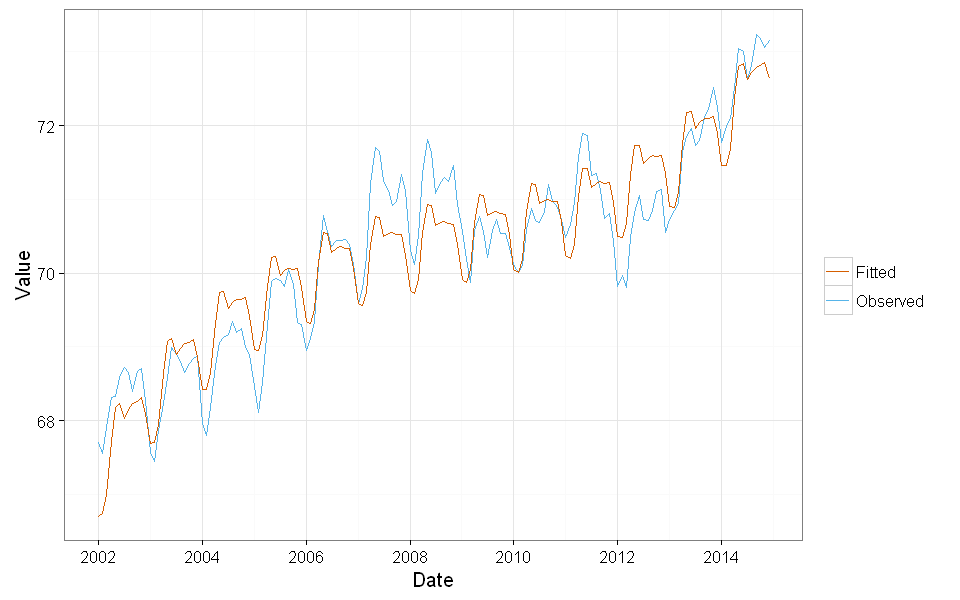

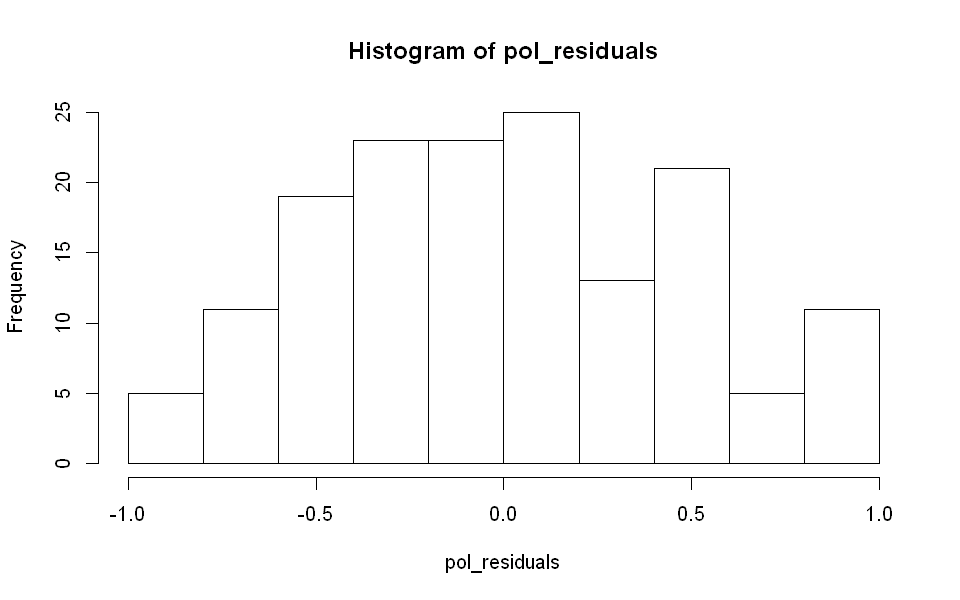

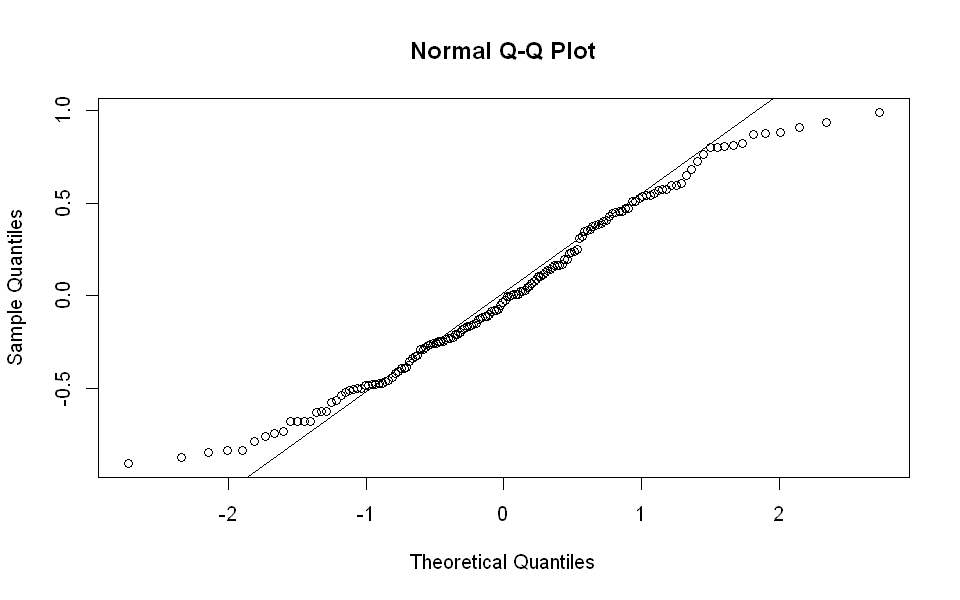

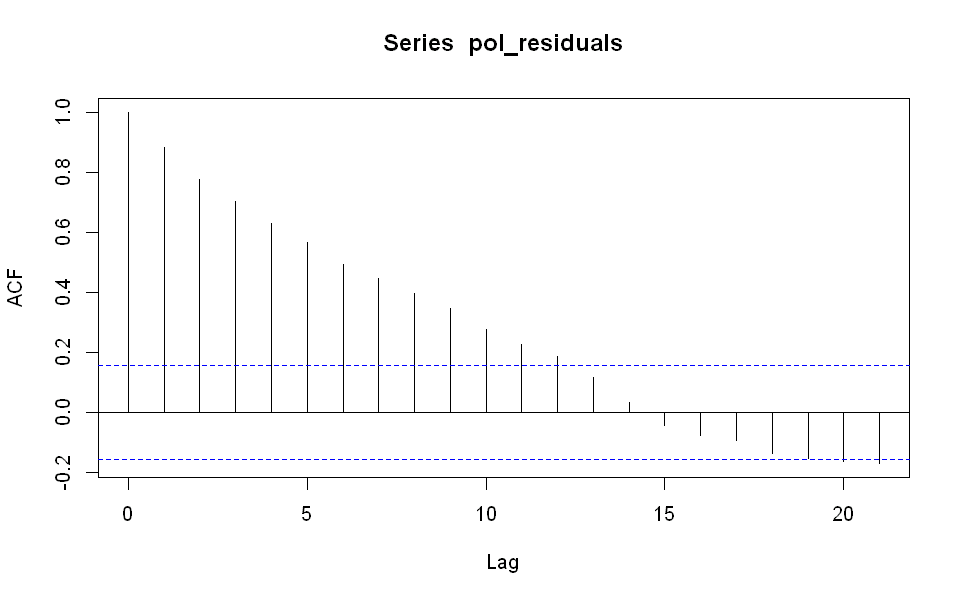

In [108]:
pol_residuals <- jp_data$Value - (jp_data$Pol_Fit + jp_data$Seasonal_Comp)
durbinWatsonTest(pol_residuals)

temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Pol_Fit + jp_data$Seasonal_Comp))
ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(pol_residuals)
qqnorm(pol_residuals)
qqline(pol_residuals)
acf(pol_residuals)

Residual Analysis, Holt

[1] 0.8465374

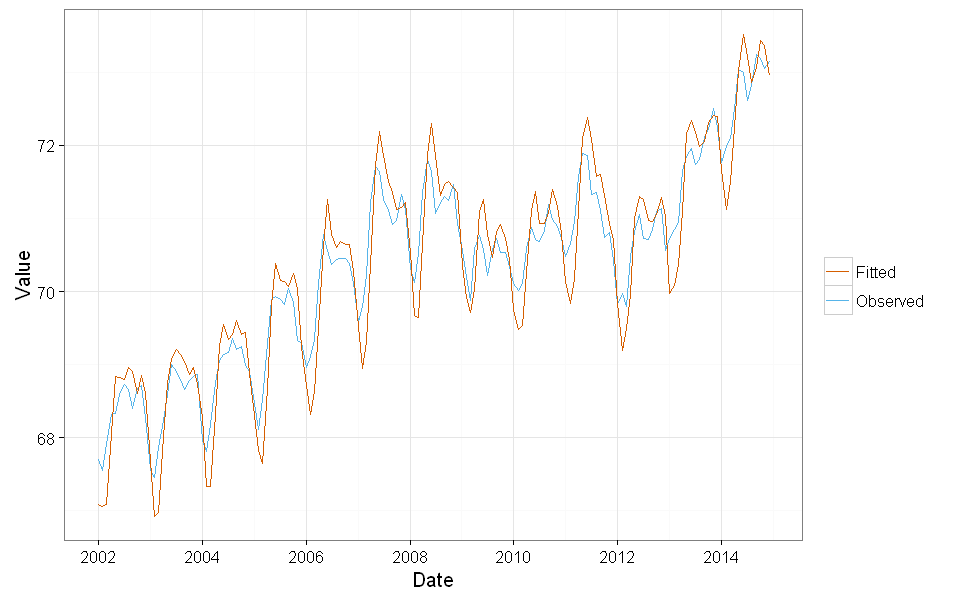

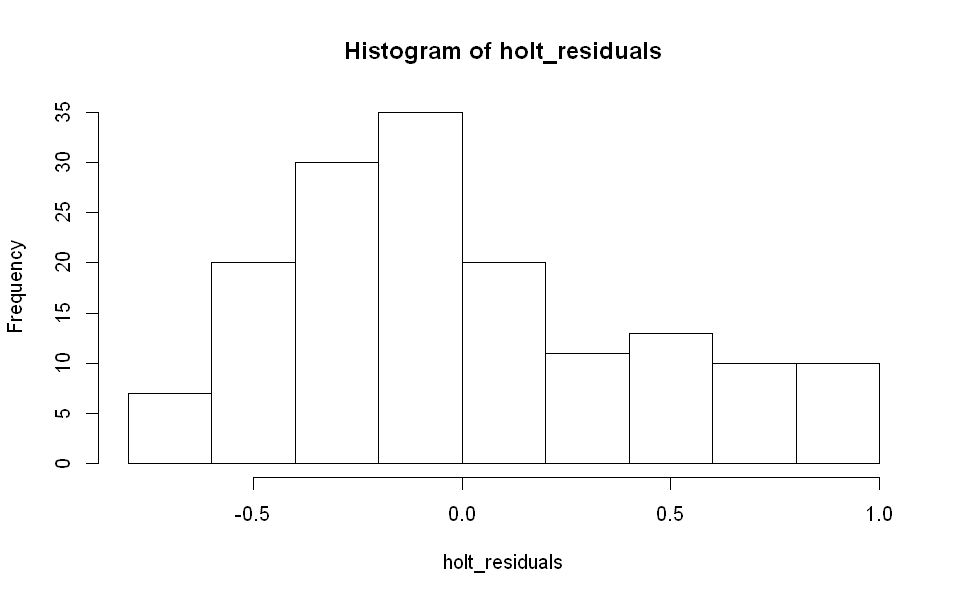

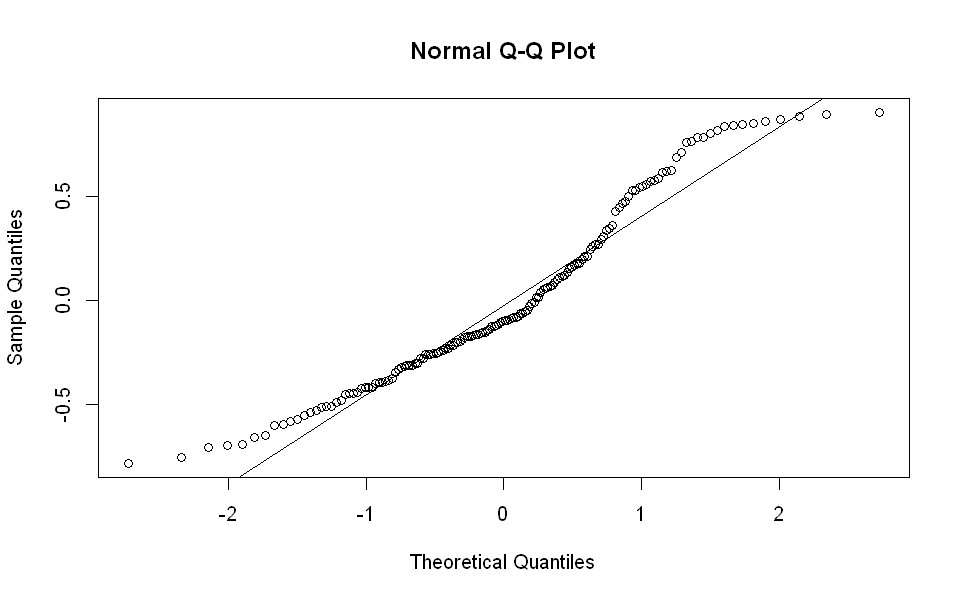

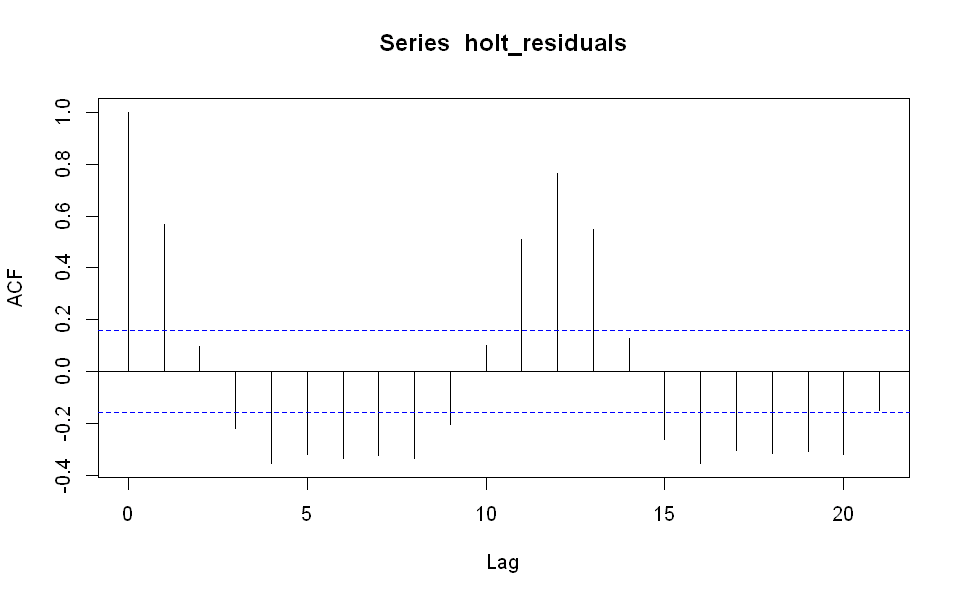

In [109]:
holt_residuals <- jp_data$Value - (jp_data$Holt_Fit + jp_data$Seasonal_Comp)
durbinWatsonTest(as.vector(holt_residuals))

temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Holt_Fit + jp_data$Seasonal_Comp))
ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(holt_residuals)
qqnorm(holt_residuals)
qqline(holt_residuals)
acf(holt_residuals)

Decompose time serie, cycle

[1] 1.718195

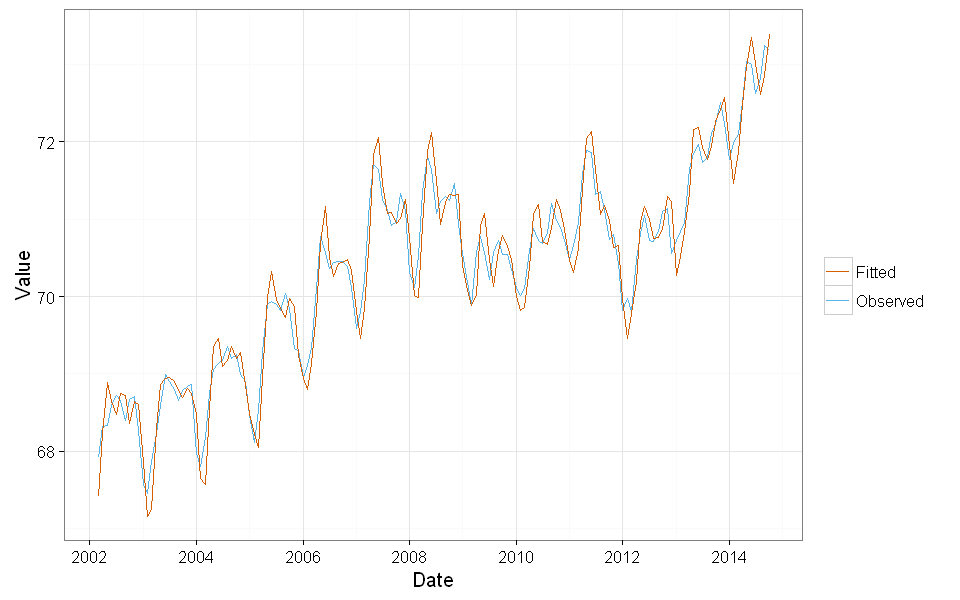

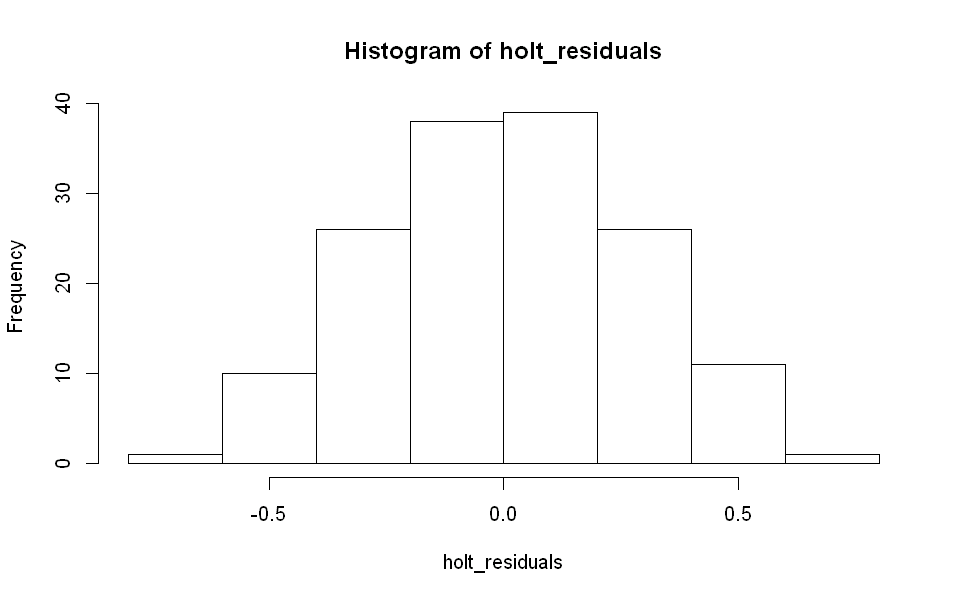

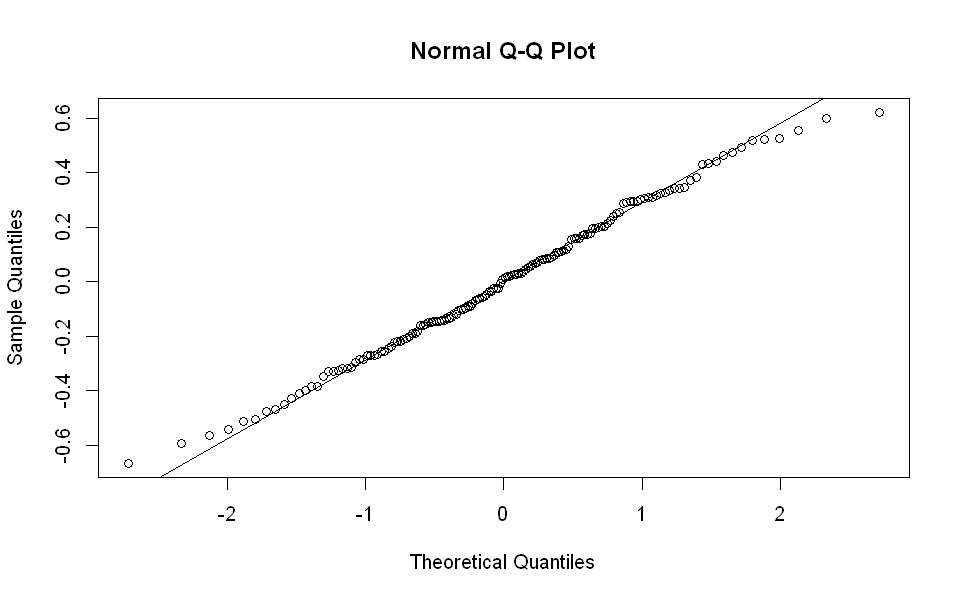

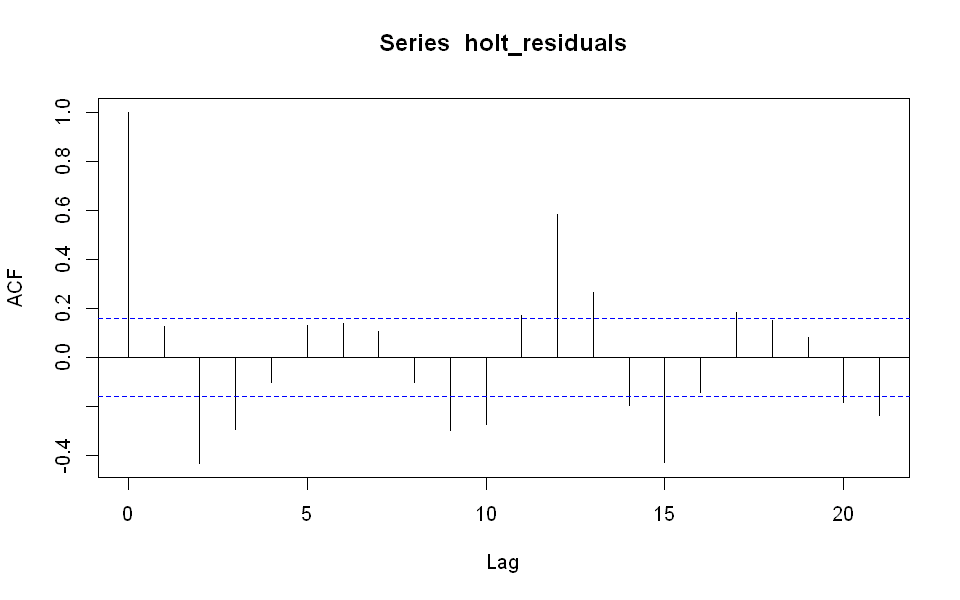

In [110]:
jp_data_shortend <- jp_data
jp_data_shortend$Clir <- jp_data_shortend$Value - (jp_data_shortend$Holt_Fit + jp_data_shortend$Seasonal_Comp)
jp_data_shortend$Cl <- ma(jp_data_shortend$Clir, 5)
jp_data_shortend <- na.omit(jp_data_shortend)
#jp_data_shortend$Ir <- jp_data_shortend$Clir - jp_data_shortend$Cl


#jp_data$Dt <- jp_data$Value - jp_data$Seasonal_Comp

#ggplot(jp_data, aes()) +
#    geom_line(aes(x = Date, y = Value, color="Observed")) +
#    geom_line(aes(x = Date, y = Dt, color="Dt")) +
#    scale_colour_manual(name="", values=c(Observed="#56B4E9", Dt="#D55E00")) +
#    theme_bw()

holt_residuals <- jp_data_shortend$Value - (jp_data_shortend$Holt_Fit + 
                                            jp_data_shortend$Seasonal_Comp + 
                                            jp_data_shortend$Cl)
durbinWatsonTest(as.vector(holt_residuals))

temp_data <- data.frame(Date = jp_data_shortend$Date,
                        Value = jp_data_shortend$Value,
                        Fitted = (jp_data_shortend$Holt_Fit + 
                                  jp_data_shortend$Seasonal_Comp + 
                                  jp_data_shortend$Cl))
ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(holt_residuals)
qqnorm(holt_residuals)
qqline(holt_residuals)
acf(holt_residuals)



Predict

Warning message:
: Removed 24 rows containing missing values (geom_path).

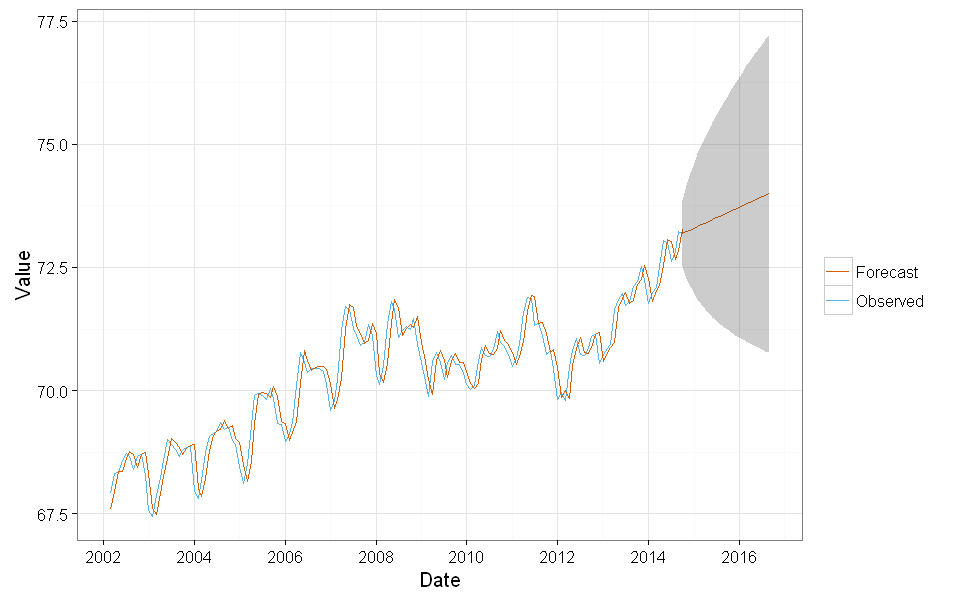

In [112]:
#help(holt)
#jp_holt_model <- holt(jp_data$Value, h=24)
#summary(jp_holt_model)

predict_data <- data.frame(Date = c(jp_data_shortend$Date, seq(as.Date("2014-10-01"), by = "month", length.out = 24)),
                        Value = c(jp_data_shortend$Value, rep(NA, 24)),
                        Forecast = c(jp_data_shortend$Holt_Fit, jp_holt_model$mean),
                        Forecast_low = c(jp_data_shortend$Holt_Fit, jp_holt_model$lower[,2]),
                        Forecast_high = c(jp_data_shortend$Holt_Fit, jp_holt_model$upper[,2]))
#predict_data

ggplot(predict_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Forecast, color="Forecast")) +
    geom_ribbon(aes(x = Date, ymin=Forecast_low, ymax=Forecast_high), alpha=.25) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Forecast="#D55E00")) +
    theme_bw()
